<a href="https://colab.research.google.com/github/MuhammadShavaiz/Clothes-Music-Generator/blob/main/Image_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing dependencies

In [7]:
!pip install tensorflow matplotlib tensorflow-datasets ipywidgets
import tensorflow as tf
# Check if GPU is available
device = tf.device("/gpu:0" if tf.config.list_physical_devices('GPU') else "/cpu")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.4 MB/s eta 0:00:00


In [8]:
# Importing datasets
import tensorflow_datasets as tfds

In [9]:
# Importing matplotlib for visulalizing
from matplotlib import pyplot as plt

In [10]:
# Bring in datasource
dataset = tfds.load('fashion_mnist', split = 'train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteVVHCUH/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteVVHCUH/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


#VISUALIZE DATA AND BUILD DATASET

In [11]:
import numpy as np

In [12]:
# Getting data out of pipeline
dataiterator = dataset.as_numpy_iterator()

In [13]:
dataiterator.next()['image']

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

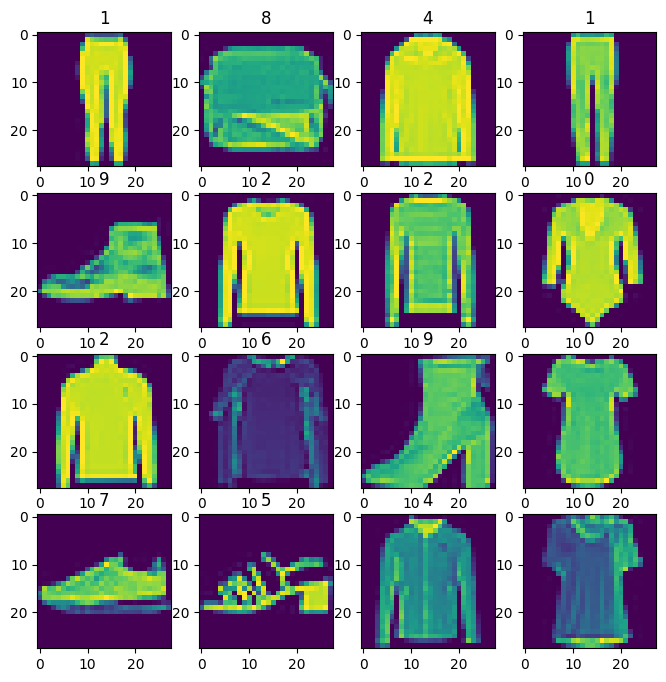

In [14]:
# Ploting the data with labels
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize = (8,8))
for row in range (4):
  for col in range (4):
    batch = dataiterator.next()
    ax[row, col].imshow(np.squeeze(batch['image']))
    ax[row, col].title.set_text(batch['label'])

In [15]:
# Scale images function
def scale_images(data):
  image = data['image']
  return image/255

In [16]:
# Applying transformations(mapping, caching, shuffling, batching, prefetching)
dataset = dataset.map(scale_images)
dataset = dataset.cache()
dataset = dataset.shuffle(60000)
dataset = dataset.batch(128)
dataset = dataset.prefetch(64)

#BUILD NEURAL NETWORK

In [17]:
# Import Modelling Components
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [18]:
# Build Generator
def build_generator():
    model = Sequential()

    model.add(Dense(7*7*128, input_dim = 128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))

    model.add(UpSampling2D())
    model.add(Conv2D(128,5, padding ='same'))
    model.add(LeakyReLU(0.2))

    model.add(UpSampling2D())
    model.add(Conv2D(128,5, padding ='same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(128,4,padding = 'same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(128,4,padding = 'same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(1,4, padding = 'same', activation = 'sigmoid'))

    return model

In [19]:
generator = build_generator()

In [20]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [36]:
# generating new images
img = generator.predict(np.random.randn(4,128,1))

1/1 [==============================] - 0s 18ms/step


In [37]:
img.shape

(4, 28, 28, 1)

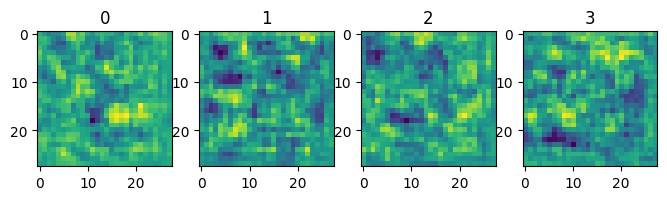

In [22]:
# plotting new images
fig, ax = plt.subplots(ncols = 4, figsize = (8,8))
for idx, img in enumerate(img):
    ax[idx].imshow(np.squeeze(img))
    ax[idx].title.set_text(idx)

In [28]:
def build_discriminator():
  model = Sequential()
  #1 conv block
  model.add(Conv2D(32, 5, input_shape = (28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  #2 conv block
  model.add(Conv2D(64 , 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  #3 conv block
  model.add(Conv2D(128, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  #4 conv block
  model.add(Conv2D(256, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #flatten, passes to dense layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation = "sigmoid"))


  return model

In [29]:
discriminator = build_discriminator()

In [30]:
discriminator.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout_9 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_10 (Dropout)        (None, 20, 20, 64)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 128)      

In [38]:
img.shape

(4, 28, 28, 1)

In [42]:
discriminator.predict(img)

1/1 [==============================] - 0s 18ms/step


array([[0.5017827],
       [0.5017169],
       [0.5019064],
       [0.5016641]], dtype=float32)

#CONSTRUCTING TRAINING LOOP


In [2]:
#setup losses and optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
gen_opt = Adam(learning_rate = 0.0001)
dis_opt = Adam(learning_rate = 0.00001)
gen_loss = BinaryCrossentropy()
dis_loss = BinaryCrossentropy()

In [3]:
#importing base model class to sub class
from tensorflow.keras.models import Model

In [ ]:
tf.random.normal((6,128,1))

In [5]:
class FashionGAN(Model):
  def __init__(self, generator, discriminator, *args, **kwargs):
    super().__init__(*args, **kwargs)
    self.generator = generator
    self.discriminator = discriminator

  def compile(self, gen_opt, dis_opt, gen_loss, dis_loss, *args, **kwargs):
    super().compile(*args, **kwargs)
    self.gen_opt = gen_opt
    self.dis_opt = dis_opt
    self.gen_loss = gen_loss
    self.dis_loss = dis_loss
    pass
  def train_step(self, batch):
    real_images = batch
    fake_images = self.generator(tf.random.normal((128,128,1)), training = False)
    #train discriminator
    with tf.GradientTape() as dis_tape:
      #passing real and fake images to discriminator
      yhat_real = self.discriminator(real_images, training = True)
      yhat_fake = self.discriminator(fake_images, training = True)
      yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)

      #create labels for real and fake images
      y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones.like(yhat_fake)], axis = 0)

      #adding noise
      noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
      noise_fake = 0.15*tf.random.uniform(tf.shape(yhat_fake))
      y_realfake += tf.concat([noise_real, noise_fake], axis = 0)

      #cal loss
      total_dis_loss = self.dis_loss(y_realfake, yhat_realfake)

    #applying backpropogation
    dgrad = dis_tape.gradient(total_dis_loss, self.discriminator.trainable_variables)
    self.dis_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
    pass